##Simple Reinforcement Learning with Tensorflow - Part-0: Q-Learning Agents

Part 0 — Q-Learning Agents [(medium)](https://medium.com/p/d195264329d0), [(ivan's colab)](https://colab.research.google.com/drive/1pnGX23MKyLBvEjowyC6X8q7sR46E2Feq#scrollTo=Jw26CKkk29zx)

Part 1 — Two-Armed Bandit [(medium)](https://medium.com/@awjuliani/super-simple-reinforcement-learning-tutorial-part-1-fd544fab149) [(ivan's colab)]()

Part 1.5 — Contextual Bandits [(medium)](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-1-5-contextual-bandits-bff01d1aad9c) [(ivan's colab)]()

Part 2 — Policy-Based Agents [(medium)](https://medium.com/@awjuliani/super-simple-reinforcement-learning-tutorial-part-2-ded33892c724) [(ivan's colab)]()

Part 3 — Model-Based RL [(medium)](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-3-model-based-rl-9a6fe0cce99) [(ivan's colab)]()

Part 4 — Deep Q-Networks and Beyond [(medium)](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-4-deep-q-networks-and-beyond-8438a3e2b8df) [(ivan's colab)]()

Part 5 — Visualizing an Agent’s Thoughts and Actions [(medium)](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-5-visualizing-an-agents-thoughts-and-actions-4f27b134bb2a#.kdgfgy7k8) [(ivan's colab)]()

Part 6 — Partial Observability and Deep Recurrent Q-Networks [(medium)](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-6-partial-observability-and-deep-recurrent-q-68463e9aeefc#.gi4xdq8pk) [(ivan's colab)]()

Part 7 — Action-Selection Strategies for Exploration [(medium)](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-7-action-selection-strategies-for-exploration-d3a97b7cceaf) [(ivan's colab)]()

Part 8 — Asynchronous Actor-Critic Agents (A3C) [(medium)](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-8-asynchronous-actor-critic-agents-a3c-c88f72a5e9f2#.hg13tn9zw) [(ivan's colab)]()

## [Part 0: Q-Learning with Tables and Neural Networks](https://medium.com/p/d195264329d0)

For this tutorial in my Reinforcement Learning series, we are going to be exploring a family of RL algorithms called **Q-Learning** algorithms. These are a little different than the policy-based algorithms that will be looked at in the the following tutorials (Parts 1–3). 

Instead of starting with a complex and unwieldy deep neural network, we will begin by implementing a simple lookup-table version of the algorithm, and then show how to implement a neural-network equivalent using Tensorflow. 

Given that we are going back to basics, it may be best to think of this as Part-0 of the series. It will hopefully give an intuition into what is really happening in Q-Learning that we can then build on going forward when we eventually combine the policy gradient and Q-learning approaches to build state-of-the-art RL agents (If you are more interested in Policy Networks, or already have a grasp on Q-Learning, feel free to start the tutorial series [here](https://medium.com/@awjuliani/super-simple-reinforcement-learning-tutorial-part-1-fd544fab149) instead).

**Policy gradient** vs ***Q*-learning**


Unlike ***policy gradient*** methods, which attempt to learn functions which directly map an observation to an action, ***Q*-Learning** attempts to learn the value of being in a given state, and taking a specific action there. While both approaches ultimately allow us to take intelligent actions given a situation, the means of getting to that action differ significantly. 

You may have heard about [DeepQ-Networks which can play Atari Games](http://www.nature.com/nature/journal/v518/n7540/full/nature14236.html). These are really just larger and more complex implementations of the Q-Learning algorithm we are going to discuss here.

For this tutorial we are going to be attempting to solve the [FrozenLake environment](https://gym.openai.com/envs/FrozenLake-v0) from the [OpenAI gym](https://gym.openai.com/). For those unfamiliar, the OpenAI gym provides an easy way for people to experiment with their learning agents in an array of provided toy games. 

The FrozenLake environment consists of a 4x4 grid of blocks, each one either being 
  - the start block, 
  - the goal block, 
  - a safe frozen block, or 
  - a dangerous hole. 
  
The objective is to have an agent learn to navigate from the start to the goal without moving onto a hole. At any given time the agent can choose to move either up, down, left, or right. 

The catch is that there is a wind which occasionally blows the agent onto a space they didn’t choose. As such, perfect performance every time is impossible, but learning to avoid the holes and reach the goal are certainly still doable. 

The **reward** at every step is 0, except for entering the goal, which provides a reward of 1. Thus, we will need an algorithm that learns long-term expected rewards. This is exactly what ***Q*-Learning** is designed to provide.

<figure><center>
<figcaption><b>Tabular Approaches for Tabular Environments</b></figcaption>
<img src="https://miro.medium.com/max/1400/1*MCjDzR-wfMMkS0rPqXSmKw.webp" width="450">
<figcaption>The rules of the FrozenLake environment</figcaption>
</center></figure>

In it’s simplest implementation, Q-Learning is a table of values for every **state** (row) and **action** (column) possible in the environment. 

Within each cell of the table, we learn a value for how good it is to take a given action within a given state. 

In the case of the FrozenLake environment, we have 16 possible states (one for each block), and 4 possible actions (the four directions of movement), giving us a $16 \times 4$ table of ***Q*-values**.

We start by initializing the table to be uniform (all zeros), and then as we observe the rewards we obtain for various actions, we update the table accordingly.

We make updates to our ***Q*-table** using something called the **Bellman equation**, which states that 
  * **Bellman equation**: *The expected long-term reward for a given action is equal to the immediate reward from the current action combined with the expected reward from the best future action taken at the following state*. 
  
In this way, we reuse our own Q-table when estimating how to update our table for future actions! In equation form, the rule looks like this:

$$
\begin{equation}
\tag{1}
Q(s,a) = r + γ(max(Q(s’,a’))
\end{equation}
$$

This says that 
- the ***Q*-value** for a given **state** (*s*) and **action** (*a*) should represent the current **reward** (*r*) plus the **maximum discounted** (*γ*) future reward expected according to our own table for the **next state** (*s’*) we would end up in. 

The **discount variable** allows us to decide how important the possible future rewards are compared to the present reward. 

By updating in this way, the table slowly begins to obtain accurate measures of the expected future reward for a given action in a given state. Below is a Python walkthrough of the Q-Table algorithm implemented in the FrozenLake environment:



##Q-Table Learning

revised from [Q-Table Learning-Clean.ipynb](https://gist.github.com/awjuliani/9024166ca08c489a60994e529484f7fe#file-q-table-learning-clean-ipynb)

In [1]:
import gym
import numpy as np

### Load the environment

In [2]:
env = gym.make('FrozenLake-v1', new_step_api=True)

### Implement Q-Table learning algorithm

In [3]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 2000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #print(a)
        #Get new state and reward from environment
        s1,r,d,_,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

In [4]:
print("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.454


In [5]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
print("Final Q-Table Values")
print(Q)


Final Q-Table Values
[[0.0568 0.0059 0.0032 0.0040]
 [0.0003 0.0003 0.0004 0.0829]
 [0.0016 0.0656 0.0004 0.0018]
 [0.0017 0.0018 0.0003 0.0439]
 [0.0790 0.0003 0.0000 0.0014]
 [0.0000 0.0000 0.0000 0.0000]
 [0.0006 0.0002 0.0129 0.0002]
 [0.0000 0.0000 0.0000 0.0000]
 [0.0011 0.0000 0.0014 0.3074]
 [0.0014 0.1100 0.0000 0.0013]
 [0.5867 0.0009 0.0008 0.0000]
 [0.0000 0.0000 0.0000 0.0000]
 [0.0000 0.0000 0.0000 0.0000]
 [0.0000 0.0000 0.4883 0.0000]
 [0.0000 0.0000 0.0000 0.9228]
 [0.0000 0.0000 0.0000 0.0000]]


## Q-Learning with Neural Networks

Now, you may be thinking: tables are great, but they don’t really scale, do they? While it is easy to have a $16 \times 4$ table for a simple grid world, the number of possible states in any modern game or real-world environment is nearly infinitely larger. For most interesting problems, tables simply don’t work. 

We instead need some way to take a description of our state, and produce ***Q*-values** for actions without a table: that is where neural networks come in. By acting as a function approximator, we can take any number of possible states that can be represented as a vector and learn to map them to ***Q*-values**.

In the case of the FrozenLake example, we will be using a one-layer network which takes the state encoded in a one-hot vector ($1 \times 16$), and produces a vector of 4 ***Q*-values**, one for each action. Such a simple network acts kind of like a glorified table, with the network weights serving as the old cells. The key difference is that we can easily expand the Tensorflow network with added layers, activation functions, and different input types, whereas all that is impossible with a regular table. The method of updating is a little different as well. Instead of directly updating our table, with a network we will be using backpropagation and a loss function. Our loss function will be sum-of-squares loss, where the difference between the current predicted ***Q*-values**, and the “target” value is computed and the gradients passed through the network. In this case, our ***Q*-target** for the chosen action is the equivalent to the ***Q*-values** computed in **Eq (1)** above.

$$
\begin{equation}
\tag{2}
Loss = ∑(Q_{target} - Q)²
\end{equation}
$$

Below is the Tensorflow walkthrough of implementing our simple Q-Network:

### Q-Network Learning (revised from [Q-Net Learning Clean.ipynb](https://gist.github.com/awjuliani/4d69edad4d0ed9a5884f3cdcf0ea0874#file-q-net-learning-clean-ipynb))

In [14]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

%matplotlib inline

Load the environment

In [15]:
env = gym.make('FrozenLake-v1', new_step_api=True)

###The Q-Network Approach

Implementing the network itself

In [16]:
tf.compat.v1.reset_default_graph()

In [17]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

#### Training the network

In [18]:
init = tf.initialize_all_variables()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of succesful episodes: 0.4365%


#### Some statistics on network performance
We can see that the network beings to consistly reach the goal around the 750 episode mark.

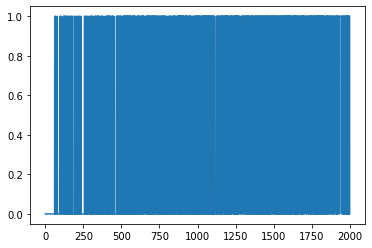

In [21]:
plt.plot(rList)

It also begins to progress through the environment for longer than chance aroudn the 750 mark as well.

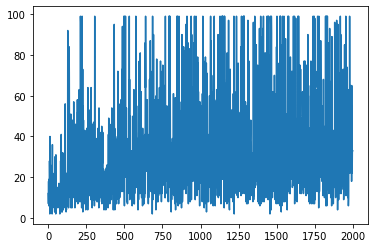

In [22]:
plt.plot(jList)

While the network learns to solve the FrozenLake problem, it turns out it doesn’t do so quite as efficiently as the Q-Table. While neural networks allow for greater flexibility, they do so at the cost of stability when it comes to Q-Learning. There are a number of possible extensions to our simple Q-Network which allow for greater performance and more robust learning. 

Two tricks in particular are referred to as (1) Experience Replay, and (2) Freezing Target Networks. 

Those improvements and other tweaks were the key to getting Atari-playing Deep Q-Networks, and we will be exploring those additions in the future. For more info on the theory behind Q-Learning, see this [great post by Tambet Matiisen](http://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/). I hope this tutorial has been helpful for those curious about how to implement simple Q-Learning algorithms!